# Week 1:Day 4
## Data Sources, Tables & Initial Assessment

In [1]:
#Import Libraries
import pandas as pd # Data processing
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import missingno as msno # Missing data - Data Visuaization
import numpy as np # Array operations
from collections import Counter # Counting

In [2]:
#Load the datasets
claims = pd.read_csv('Data/claims.csv')
policyholders = pd.read_csv('Data/policyholders.csv')
thirdparties = pd.read_csv('Data/third_parties.csv')

In [3]:
#Viewing the headings and few data of claims table
claims.head()

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,Severity_Band,Settlement_Date,Status
0,CLM30000,POL14506,19/12/2019,19/12/2019,Theft,Medium,False,True,5243,2808.0,Minor,01/03/2020,settled
1,CLM30001,POL14338,30/12/2018,31/12/2018,Collision,Low,False,False,3934,2952.0,Minor,23/03/2019,settled
2,CLM30002,POL13575,19/10/2021,19/10/2021,Other,Medium,False,False,153631,156497.0,Catastrophic,22/04/2022,settled
3,CLM30003,POL10138,18/06/2021,18/06/2021,Weather,Low,False,False,2812,1450.0,Minor,13/09/2021,settled
4,CLM30004,POL12316,21/03/2021,24/03/2021,Theft,Low,False,False,5094,4243.0,Minor,26/05/2021,settled


In [4]:
#Viewing the headings and few data of policyholders table
policyholders.head()

,Policy_ID,Customer_ID,Age_of_Driver,Gender,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band
0,POL10000,CUST20000,56,Female,Retired,Newcastle,7552,36,Sedan,10,Fair
1,POL10001,CUST20001,53,Female,Unemployed,Bristol,13275,31,Motorcycle,11,Poor
2,POL10002,CUST20002,19,Female,Unemployed,London,12967,0,Sedan,9,Excellent
3,POL10003,CUST20003,77,Female,Retired,Birmingham,4346,56,Hatchback,2,Fair
4,POL10004,CUST20004,24,Male,Employed,Manchester,9598,2,Sedan,14,Good


In [5]:
#Viewing the headings and few data of thirdparties table
thirdparties.head()

,Claim_ID,TP_ID,ThirdParty_Role,TP_Injury_Severity
0,CLM30000,TP40000,Pedestrian,Minor
1,CLM30002,TP40001,Passenger,Minor
2,CLM30007,TP40002,Pedestrian,Minor
3,CLM30012,TP40003,Pedestrian,Minor
4,CLM30015,TP40004,Driver,Minor


In [6]:
#Dimensionality of the data - The number of rows and columns in claims table
claims.shape

#NB: The result below shows we have 13 columns and 8000 records in the claims Dataset

(8000, 13)

In [7]:
#Dimensionality of the data - The number of rows and columns in policyholders table
policyholders.shape

#NB: The result below shows we have 11 columns and 5000 records in the policyholders Dataset

(5000, 11)

In [8]:
#Dimensionality of the data - The number of rows and columns in thirdparties table
thirdparties.shape

#NB: The result below shows we have 4 columns and 2410 records in the thirdparties Dataset

(2410, 4)

In [9]:
#Viewing basic statistics of the claims dataset
claims.describe()

# Looking at the result below:
    # The difference in the mean and 50th percentile for Ultimate Claim amount are very significant(9710), meaning there is much effect of outliers in the dataset.
    # Standard deviations are ~3× the mean, confirming heavy tails. Catastrophic claims dominate portfolio risk.Standard deviations are ~3× the mean, confirming heavy tails. Catastrophic claims dominate portfolio risk.
    # Estimated Claim Amount are consistently higher than ultimate claim amount across the distribution.
        #•  Mean
           # •	Estimated: 14,480
           # •	Ultimate: 13,119
       # •  Median
           # •	Estimated: 4,416
           # •	Ultimate: 3,409

,Estimated_Claim_Amount,Ultimate_Claim_Amount
count,8.000000e+03,7.575000e+03
mean,1.447988e+04,1.311868e+04
std,3.873981e+04,3.810405e+04
min,5.500000e+02,3.320000e+02
25%,2.205750e+03,1.578000e+03
50%,4.416000e+03,3.409000e+03
75%,1.167475e+04,9.744000e+03
max,1.064239e+06,1.005590e+06


In [10]:
#Viewing basic statistics of the policy holders dataset
policyholders.describe()

# Looking at the result below:

# The portfolio is dominated by middle-aged to older drivers, not young drivers.
#•  Range: 18 – 79 years
#•  Median: 49 years
#•  IQR: 33 – 65 years
    
#Most drivers are experienced, which may reduce frequency but not necessarily severity.
#•  Median: 29 years
#•  Max: 61 years

# Most drivers are experienced, which may reduce frequency of accidents but not necessarily severity.
# •  Median: 29 years
# •  Max: 61 years

# Fleet is relatively old, which can increase severity and increase third-party damage risk.
# •  Median: 10 years
# •  75% ≤ 15 years
# •  Max: 20 years


,Age_of_Driver,Annual_Mileage,Driving_Experience_Years,Vehicle_Age
count,5000.0000,5000.000000,5000.000000,5000.0000
mean,48.7524,12125.190800,28.817600,9.9910
std,17.9704,4036.274571,17.919335,6.0998
min,18.0000,500.000000,0.000000,0.0000
25%,33.0000,9388.250000,13.000000,5.0000
50%,49.0000,12082.000000,29.000000,10.0000
75%,65.0000,14860.750000,45.000000,15.0000
max,79.0000,27410.000000,61.000000,20.0000


In [11]:
#Viewing basic statistics of the third parties dataset
thirdparties.describe()

# Looking at the result below:

# Some claims appear more than once, which is expected if a single claim involves multiple third parties
# •  Count: 2,410
# •  Unique: 1,997

# Most third-party injuries involve passengers, not pedestrians or other drivers.
# Passenger is dominant (836 records)

# Minor injuries dominate with the highest frequency of 2050.


,Claim_ID,TP_ID,ThirdParty_Role,TP_Injury_Severity
count,2410,2410,2410,2410
unique,1997,2410,3,3
top,CLM37990,TP40000,Passenger,Minor
freq,2,1,836,2050


In [12]:
#Checking the data consistency recorded by comparing the age of the driver to their corresponding years of experience

(policyholders['Driving_Experience_Years'] > policyholders['Age_of_Driver']).sum()

#The result below shows no record of the years of experience greater than the age of the driver which indicates there is no data capturing error.

0

In [13]:
# Examine the columns in the claims table
claims.columns

Index(['Claim_ID', 'Policy_ID', 'Accident_Date', 'FNOL_Date', 'Claim_Type',
       'Claim_Complexity', 'Fraud_Flag', 'Litigation_Flag',
       'Estimated_Claim_Amount', 'Ultimate_Claim_Amount', 'Severity_Band',
       'Settlement_Date', 'Status'],
      dtype='object')

In [14]:
# Examine the columns in the policy holders table
policyholders.columns

Index(['Policy_ID', 'Customer_ID', 'Age_of_Driver', 'Gender', 'Occupation',
       'Region', 'Annual_Mileage', 'Driving_Experience_Years', 'Vehicle_Type',
       'Vehicle_Age', 'Credit_Score_Band'],
      dtype='object')

In [15]:
# Examine the columns in the third parties table
thirdparties.columns

Index(['Claim_ID', 'TP_ID', 'ThirdParty_Role', 'TP_Injury_Severity'], dtype='object')

### Investigating the dataset for anomalies and data type issues

In [16]:
# Understanding the structure and content of the claims DataFrame
claims.info()

#From the result below:
    # Ultimate_Claim_Amount and Settlement_Date have missing data
    # The data types of Claim_Type, Claim_Complexity, Severity_Band and Status are objects. It is prefered they are in category data type.
    # The data types of Accident_Date, FNOL_Date and Settlement_Date are objects. They should be Datetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Claim_ID                8000 non-null   object 
 1   Policy_ID               8000 non-null   object 
 2   Accident_Date           8000 non-null   object 
 3   FNOL_Date               8000 non-null   object 
 4   Claim_Type              8000 non-null   object 
 5   Claim_Complexity        8000 non-null   object 
 6   Fraud_Flag              8000 non-null   bool   
 7   Litigation_Flag         8000 non-null   bool   
 8   Estimated_Claim_Amount  8000 non-null   int64  
 9   Ultimate_Claim_Amount   7575 non-null   float64
 10  Severity_Band           8000 non-null   object 
 11  Settlement_Date         7575 non-null   object 
 12  Status                  8000 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(9)
memory usage: 703.3+ KB


In [17]:
# Understanding the structure and content of the policyholders DataFrame
policyholders.info()

#From the result below:
    #There are no missing data recorded.
    #The data types of Gender, Occupation, Region, Vehicle_Type and Credit_Score_Band are objects. It is prefered they are in the category data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Policy_ID                 5000 non-null   object
 1   Customer_ID               5000 non-null   object
 2   Age_of_Driver             5000 non-null   int64 
 3   Gender                    5000 non-null   object
 4   Occupation                5000 non-null   object
 5   Region                    5000 non-null   object
 6   Annual_Mileage            5000 non-null   int64 
 7   Driving_Experience_Years  5000 non-null   int64 
 8   Vehicle_Type              5000 non-null   object
 9   Vehicle_Age               5000 non-null   int64 
 10  Credit_Score_Band         5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


In [18]:
# Understanding the structure and content of the thirdparties DataFrame
thirdparties.info()

#From the result below:
    #There are no missing data recorded.
    #The data types of ThirdParty_Role and TP_Injury_Severity are objects. It is prefered they are in category data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Claim_ID            2410 non-null   object
 1   TP_ID               2410 non-null   object
 2   ThirdParty_Role     2410 non-null   object
 3   TP_Injury_Severity  2410 non-null   object
dtypes: object(4)
memory usage: 75.4+ KB


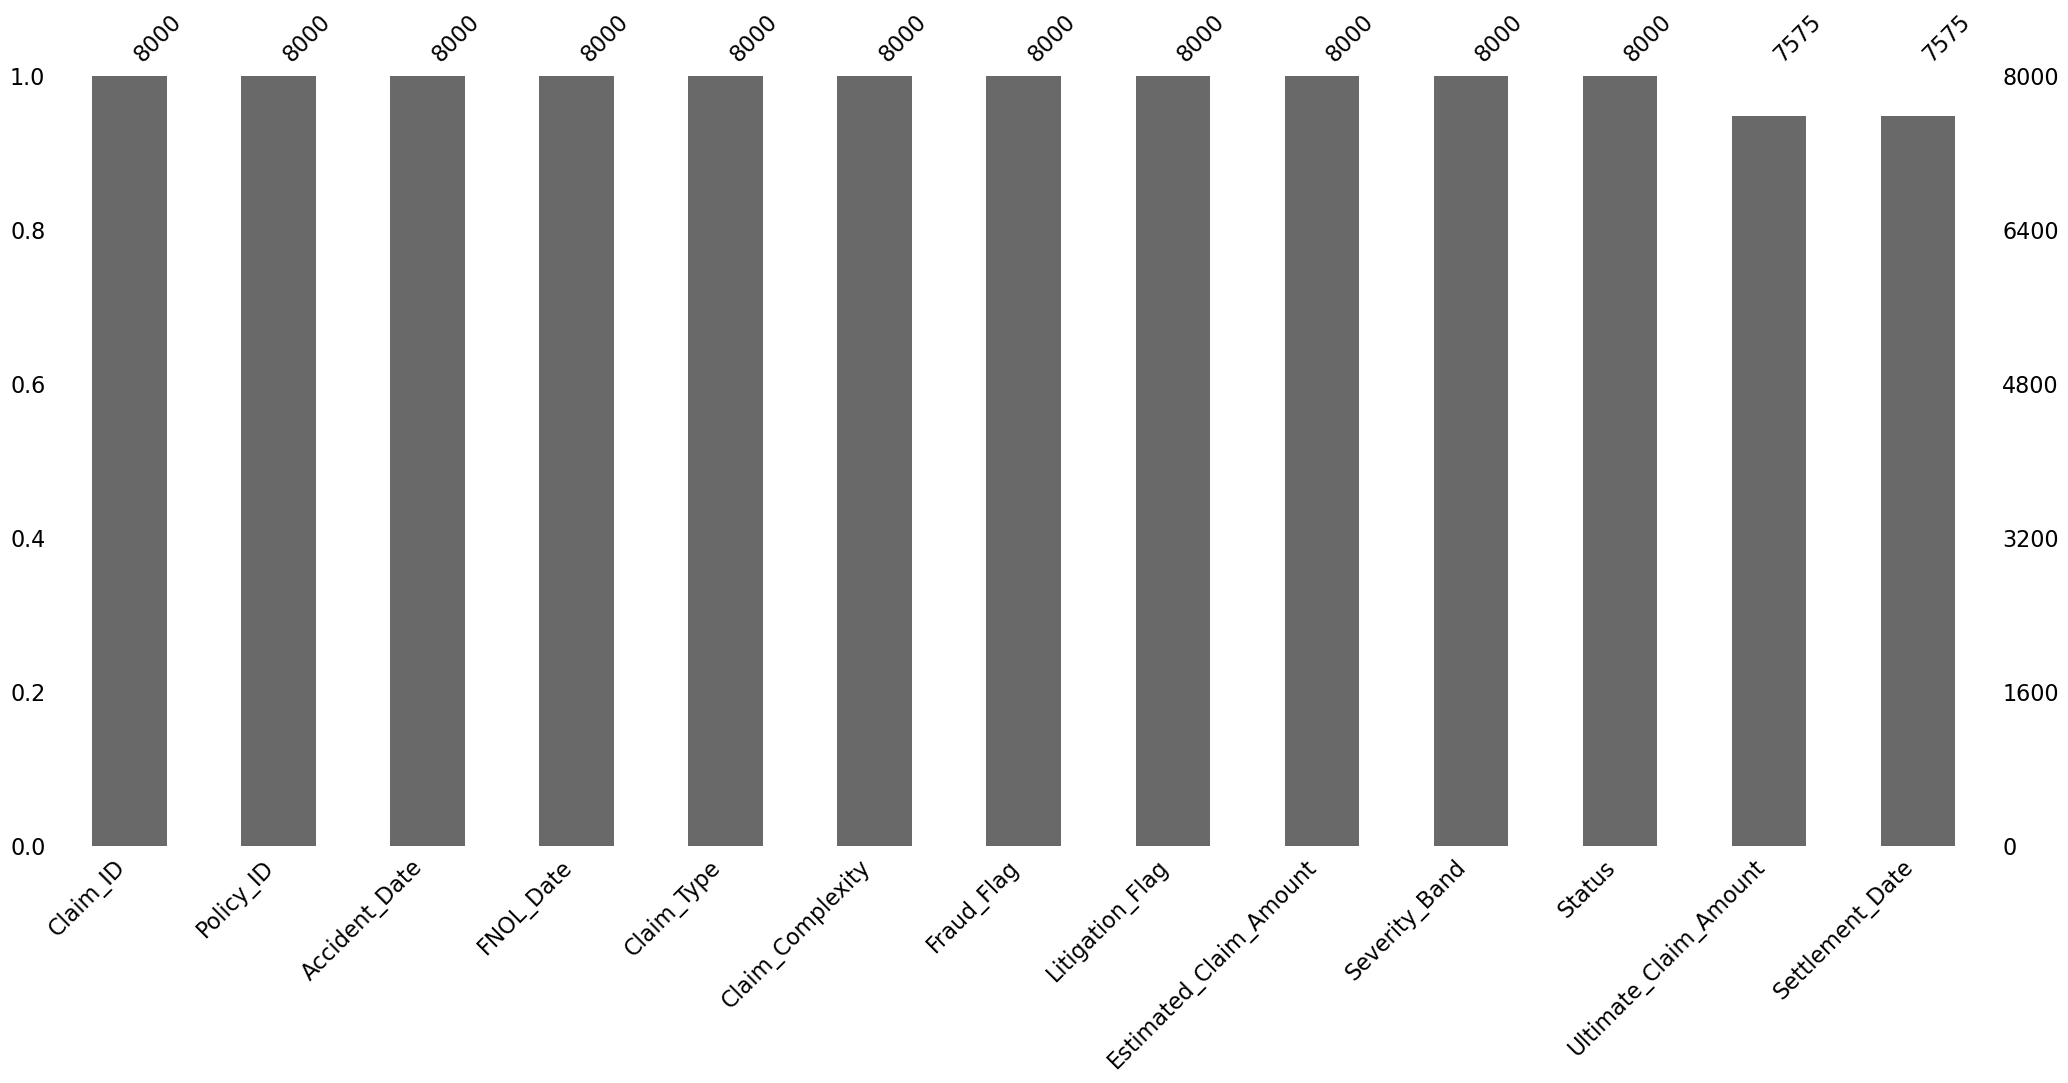

In [19]:
#Visualize the missing data on claims table
non_null_counts = claims.count()
sorted_columns = non_null_counts.sort_values(ascending=False).index
claims_sorted = claims[sorted_columns]
msno.bar(claims_sorted);

# The graph displayed shows:
    # Ultimate_Claim_Amount and Settlement_Date have missing data
    # These issues indicates incomplete tracking of records

In [20]:
#Check how many values are missing in the Ultimate_Claim_Amount

Total_Missing_Ultimate = claims['Ultimate_Claim_Amount'].isna().sum()
print(f"Total number of missing values in Ultimate_Claim_Amount: {Total_Missing_Ultimate}")

#Check how many values are missing in the Settlement_Date

Total_Missing_SettleDate = claims['Settlement_Date'].isna().sum()
print(f"Total number of missing values in Settlement_Date: {Total_Missing_SettleDate}")

# The result shows we have 425 entries missing each for Ultimate_Claim_Amount and Settlement_Date

Total number of missing values in Ultimate_Claim_Amount: 425
Total number of missing values in Settlement_Date: 425


In [21]:
# Check if there are duplicate values in the claims table
Claim_ID_duplicates = claims['Claim_ID'].duplicated().sum()
print(f"Number of duplicate Claim_ID: {Claim_ID_duplicates}")

#The result below confirms Claim_ID is a Unique identifier for each trip meaning there are no duplicate records

Number of duplicate Claim_ID: 0


In [22]:
# Check if there are duplicate values in the policyholders table
Policy_ID_duplicates = policyholders['Policy_ID'].duplicated().sum()
print(f"Number of duplicate Policy_ID: {Policy_ID_duplicates}")

#The result below confirms Policy_ID is a Unique identifier for each trip meaning there are no duplicate records

Number of duplicate Policy_ID: 0


In [23]:
# Check if there are duplicate values in the thirdparties table
TP_ID_duplicates = thirdparties['TP_ID'].duplicated().sum()
print(f"Number of duplicate TP_ID: {TP_ID_duplicates}")

#The result below confirms TP_ID is a Unique identifier for each trip meaning there are no duplicate records

Number of duplicate TP_ID: 0


In [24]:
#### Checking for inconsistencies in the claims table

# Check inconsistencies in the 'Claim_Type' column
unique_Claim_Type = claims['Claim_Type'].unique()
print(f"Unique entries in the Claim_type feature are: {unique_Claim_Type}")

# Check inconsistencies in the 'Claim_Complexity' column
unique_Claim_Complexity = claims['Claim_Complexity'].unique()
print(f"Unique entries in the Claim_Complexity feature are: {unique_Claim_Complexity}")

# Check inconsistencies in the 'Fraud_Flag' column
unique_Flag_Complexity = claims['Fraud_Flag'].unique()
print(f"Unique entries in the Fraud_Flag feature are: {unique_Flag_Complexity}")

# Check inconsistencies in the 'Litigation_Flag' column
unique_Litigation_Flag = claims['Litigation_Flag'].unique()
print(f"Unique entries in the Litigation_Flag feature are: {unique_Litigation_Flag}")

# Check inconsistencies in the 'Severity_Band' column
unique_Severity_Band = claims['Severity_Band'].unique()
print(f"Unique entries in the Severity_Band feature are: {unique_Severity_Band}")

# Check inconsistencies in the 'Status' column
unique_Status = claims['Status'].unique()
print(f"Unique entries in the Status feature are: {unique_Status}")

# The results below shows no inconsistencies were found

Unique entries in the Claim_type feature are: ['Theft' 'Collision' 'Other' 'Weather' 'Fire' 'Vandalism']
Unique entries in the Claim_Complexity feature are: ['Medium' 'Low' 'High']
Unique entries in the Fraud_Flag feature are: [False  True]
Unique entries in the Litigation_Flag feature are: [ True False]
Unique entries in the Severity_Band feature are: ['Minor' 'Catastrophic' 'Major' 'Severe' 'Moderate']
Unique entries in the Status feature are: ['settled' 'open']


In [25]:
#### Checking for inconsistencies in the policyholders table

# Check inconsistencies in the 'Gender' column
unique_Gender = policyholders['Gender'].unique()
print(f"Unique entries in the Gender feature are: {unique_Gender}")

# Check inconsistencies in the 'Occupation' column
unique_Occupation = policyholders['Occupation'].unique()
print(f"Unique entries in the Occupation feature are: {unique_Occupation}")

# Check inconsistencies in the 'Region' column
unique_Region = policyholders['Region'].unique()
print(f"Unique entries in the Region feature are: {unique_Region}")

# Check inconsistencies in the 'Vehicle_Type' column
unique_Vehicle_Type = policyholders['Vehicle_Type'].unique()
print(f"Unique entries in the Vehicle_Type feature are: {unique_Vehicle_Type}")

# Check inconsistencies in the 'Credit_Score_Band' column
unique_Credit_Score_Band = policyholders['Credit_Score_Band'].unique()
print(f"Unique entries in the Credit_Score_Band feature are: {unique_Credit_Score_Band}")

# The results below shows no inconsistencies were found

Unique entries in the Gender feature are: ['Female' 'Male']
Unique entries in the Occupation feature are: ['Retired' 'Unemployed' 'Employed' 'Self-Employed' 'Student']
Unique entries in the Region feature are: ['Newcastle' 'Bristol' 'London' 'Birmingham' 'Manchester' 'Glasgow'
 'Leeds' 'Edinburgh' 'Cardiff' 'Liverpool']
Unique entries in the Vehicle_Type feature are: ['Sedan' 'Motorcycle' 'Hatchback' 'SUV' 'Van' 'Coupe']
Unique entries in the Credit_Score_Band feature are: ['Fair' 'Poor' 'Excellent' 'Good']


In [26]:
#### Checking for inconsistencies in the third_parties table

# Check inconsistencies in the 'ThirdParty_Role' column
unique_ThirdParty_Role = thirdparties['ThirdParty_Role'].unique()
print(f"Unique entries in the ThirdParty_Role feature are: {unique_ThirdParty_Role}")

# Check inconsistencies in the 'TP_Injury_Severity' column
unique_TP_Injury_Severity = thirdparties['TP_Injury_Severity'].unique()
print(f"Unique entries in the TP_Injury_Severity feature are: {unique_TP_Injury_Severity}")

# The results below shows no inconsistencies were found

Unique entries in the ThirdParty_Role feature are: ['Pedestrian' 'Passenger' 'Driver']
Unique entries in the TP_Injury_Severity feature are: ['Minor' 'Serious' 'Fatal']


#### Checking the distribution of the target variable (ie. Ultimate_Claim_Amount)

In [27]:
claims['Ultimate_Claim_Amount'].describe(percentiles=[0.9, 0.95, 0.99])

#Looking at the results below:

#Mean is ~4× the median, showing that a few large claims dominate the average.
    # Mean: 13,119
    # Median (50%): 3,409

#The top 1% of claims are larger than the median
    #•  90% ≤ 28,838
    #•  95% ≤ 50,173
    #•  99% ≤ 174,838
    #•  Max ≈ 1,005,590


count    7.575000e+03
mean     1.311868e+04
std      3.810405e+04
min      3.320000e+02
50%      3.409000e+03
90%      2.883780e+04
95%      5.017290e+04
99%      1.748378e+05
max      1.005590e+06
Name: Ultimate_Claim_Amount, dtype: float64

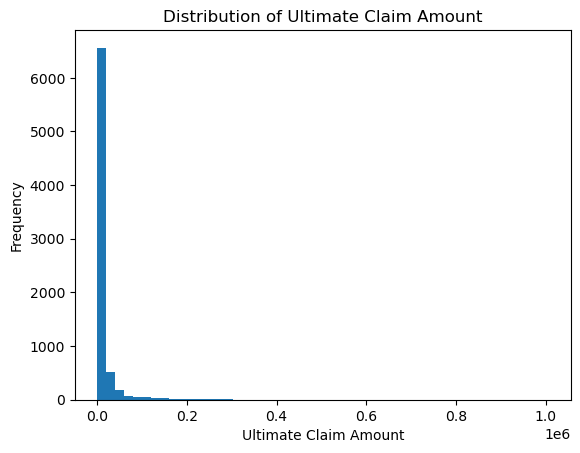

In [3]:
# Histogram on Ultimate Claim Amount

plt.figure()
plt.hist(claims['Ultimate_Claim_Amount'], bins=50)
plt.xlabel('Ultimate Claim Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Ultimate Claim Amount')
plt.savefig('Visualizations/Data Sources, Tables & Initial Assessment/Histogram of Ultimate Claim Amount.png', dpi=300, bbox_inches='tight')
plt.show()

#Looking at the results below:
# The graph is extremely right skewed which shows the presence of outliers in the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

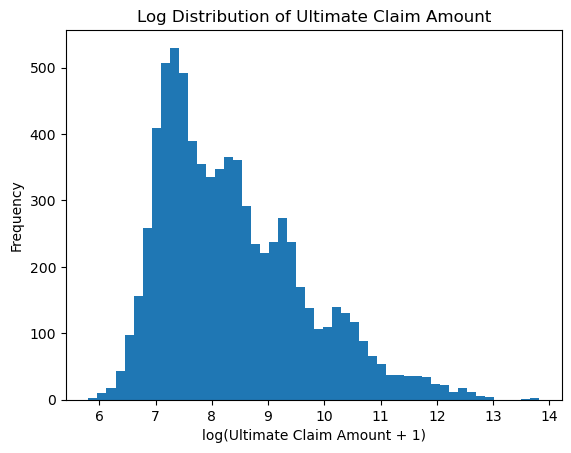

In [4]:
#Histogram on Ultimate Claim Amount (log)
plt.figure()
plt.hist(np.log1p(claims['Ultimate_Claim_Amount']), bins=50)
plt.xlabel('log(Ultimate Claim Amount + 1)')
plt.ylabel('Frequency')
plt.title('Log Distribution of Ultimate Claim Amount')
plt.savefig('Visualizations/Data Sources, Tables & Initial Assessment/Log Distribution of Ultimate Claim Amount.png', dpi=300, bbox_inches='tight')
plt.show

#Looking at the results below:
#Most values lie between ~7 and 9.5 on the log scale

In [30]:
# Converting predictions on the "Histogram on Ultimate Claim Amount" back to money
y_pred7 = np.expm1(7)
print (y_pred7)

y_pred8 = np.expm1(8)
print (y_pred8)

y_pred9 = np.expm1(9)
print (y_pred9)

y_pred10 = np.expm1(10)
print (y_pred10)

y_pred12 = np.expm1(12)
print (y_pred12)

#Looking at the results below:
#The model will be most accurate in this range.

1095.6331584284585
2979.9579870417283
8102.083927575384
22025.465794806718
162753.79141900392


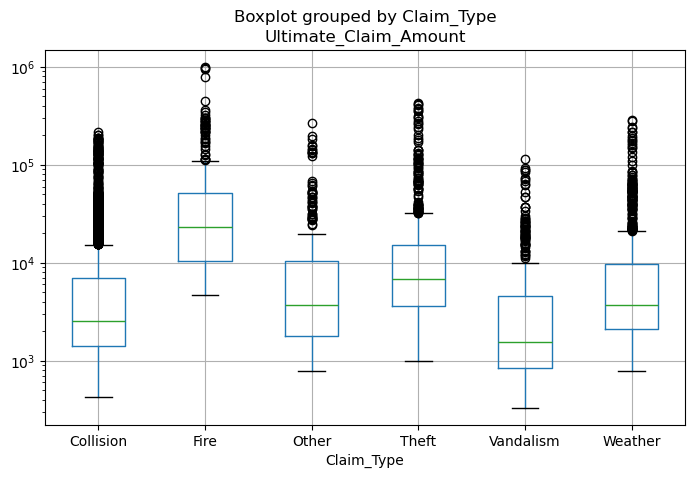

In [5]:
#Boxplot grouped by Claim_Type
claims.boxplot(
    column='Ultimate_Claim_Amount',
    by='Claim_Type',
    figsize=(8,5)
)
plt.yscale('log')
plt.savefig('Visualizations/Data Sources, Tables & Initial Assessment/Boxplot grouped by Claim Type (Ultimate Claim Amount).png', dpi=300, bbox_inches='tight')
plt.show()

#Looking at the results below:
# The dots shows extreme claims (outliers) in the data.
# Fire and Theft claims drive the tail risk, while Vandalism drives volume but not cost

#### Joining claims, policy holders and third parties schemas

In [32]:
# Joining claims to policy holders

claims_policy = claims.merge(
    policyholders,
    on='Policy_ID',
    how='left'
)

In [33]:
claims.shape

(8000, 13)

In [34]:
claims_policy.shape

# The result below shows the columns have increased because of the join

(8000, 23)

In [35]:
claims_full = claims_policy.merge(
    thirdparties,
    on='Claim_ID',
    how='left'
)

In [36]:
claims_full.shape

#The result below shows the count of records has increased from 8000 to 8413. 
#This can negatively affect the prediction of the ultimate claim amount by the model and needs to be corrected

(8413, 26)

In [37]:
# Encode injury severity properly

severity_map = {
    'Minor': 1,
    'Serious': 2,
    'Fatal': 3
}

thirdparties = thirdparties.copy()
thirdparties['TP_Injury_Severity_Num'] = (
    thirdparties['TP_Injury_Severity'].map(severity_map)
)

In [38]:
#Aggregate third-party data at claim level
tp_agg = (
    thirdparties
    .groupby('Claim_ID')
    .agg(
        num_third_parties=('TP_ID', 'count'),

        max_injury_severity=('TP_Injury_Severity_Num', 'max'),

        has_minor=('TP_Injury_Severity', lambda x: (x == 'Minor').any()),
        has_serious=('TP_Injury_Severity', lambda x: (x == 'Serious').any()),
        has_fatality=('TP_Injury_Severity', lambda x: (x == 'Fatal').any()),

        has_pedestrian=('ThirdParty_Role', lambda x: (x == 'Pedestrian').any()),
        has_passenger=('ThirdParty_Role', lambda x: (x == 'Passenger').any()),
        has_driver=('ThirdParty_Role', lambda x: (x == 'Driver').any())
    )
    .reset_index()
)


In [32]:
#Viewing tp_agg table

tp_agg.head()

,Claim_ID,num_third_parties,max_injury_severity,has_minor,has_serious,has_fatality,has_pedestrian,has_passenger,has_driver
0,CLM30000,1,1,True,False,False,True,False,False
1,CLM30002,1,1,True,False,False,False,True,False
2,CLM30007,1,1,True,False,False,True,False,False
3,CLM30012,1,1,True,False,False,True,False,False
4,CLM30015,1,1,True,False,False,False,False,True


In [26]:
tp_agg['num_third_parties'].unique()

#The results below confirms some claims have multiple thirdparties involved

array([1, 2], dtype=int64)

In [27]:
tp_agg['max_injury_severity'].unique()

array(['Minor', 'Serious', 'Fatal'], dtype=object)

In [33]:
# Joining claims_policy table to tp_agg table

claims_complete = (
    claims
    .merge(policyholders, on='Policy_ID', how='left')
    .merge(tp_agg, on='Claim_ID', how='left')
)

In [34]:
claims_complete.shape

# The result below shows the columns have increased because of the join

(8000, 31)

In [35]:
# Viewing the columns

claims_complete.head()

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,...,Vehicle_Age,Credit_Score_Band,num_third_parties,max_injury_severity,has_minor,has_serious,has_fatality,has_pedestrian,has_passenger,has_driver
0,CLM30000,POL14506,19/12/2019,19/12/2019,Theft,Medium,False,True,5243,2808.0,...,6,Excellent,1.0,1.0,True,False,False,True,False,False
1,CLM30001,POL14338,30/12/2018,31/12/2018,Collision,Low,False,False,3934,2952.0,...,9,Fair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CLM30002,POL13575,19/10/2021,19/10/2021,Other,Medium,False,False,153631,156497.0,...,5,Excellent,1.0,1.0,True,False,False,False,True,False
3,CLM30003,POL10138,18/06/2021,18/06/2021,Weather,Low,False,False,2812,1450.0,...,13,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CLM30004,POL12316,21/03/2021,24/03/2021,Theft,Low,False,False,5094,4243.0,...,12,Excellent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
tp_agg['has_fatality'].unique()

array([False,  True])

In [38]:
#Viewing the details of the claims_complete table

claims_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Claim_ID                  8000 non-null   object 
 1   Policy_ID                 8000 non-null   object 
 2   Accident_Date             8000 non-null   object 
 3   FNOL_Date                 8000 non-null   object 
 4   Claim_Type                8000 non-null   object 
 5   Claim_Complexity          8000 non-null   object 
 6   Fraud_Flag                8000 non-null   bool   
 7   Litigation_Flag           8000 non-null   bool   
 8   Estimated_Claim_Amount    8000 non-null   int64  
 9   Ultimate_Claim_Amount     7575 non-null   float64
 10  Severity_Band             8000 non-null   object 
 11  Settlement_Date           7575 non-null   object 
 12  Status                    8000 non-null   object 
 13  Customer_ID               8000 non-null   object 
 14  Age_of_D